## Pedestrian Detection: traditional vs deep learning pre-trained models

Approach 1: OpenCV, pretrained HOG and Linear SVM (this notebook)
Approach 2: YOLOv5 (using anaconda)

In [10]:
# geeksforgeeks tutorial using OpenCV, pretrained HOG and Linear SVM models
# install open cv and imutils

!pip install opencv-python

# !pip freeze    # checks current libraries 

  Using cached opencv_python-4.6.0.66-cp36-abi3-win_amd64.whl (35.6 MB)


In [12]:
!pip install imutils


  Using cached imutils-0.5.4.tar.gz (17 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for imutils: filename=imutils-0.5.4-py3-none-any.whl size=25847 sha256=a7260b3840040944e33343ed6372dc0e3b9c417103d11c14681cf4fb5f1622b2
  Stored in directory: c:\users\maria.gedye\appdata\local\pip\cache\wheels\4b\a5\2d\4a070a801d3a3d93f033d3ee9728f470f514826e89952df3ea
Successfully built imutils


In [15]:
import cv2
import imutils

# Initialising the HOG person detector
hog = cv2.HOGDescriptor()
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())

# Reading the Image
image = cv2.imread('image.png')

# Resizing the Image
image = imutils.resize(image,width=min(400, image.shape[1]))

# Detecting all the regions in the Image that has a pedestrians inside it
(regions, _) = hog.detectMultiScale(image,winStride=(4, 4),padding=(4, 4),scale=1.05)

# Drawing the regions in the Image
for (x, y, w, h) in regions:cv2.rectangle(image, (x, y),(x + w, y + h),(0, 0, 255), 2)

# Showing the output Image
cv2.imshow("Image", image)
cv2.waitKey(0)

cv2.destroyAllWindows()


In [ ]:
#this cell performs detection for video format mp4
import cv2
import imutils

# Initialising the HOG person detector
hog = cv2.HOGDescriptor()
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())

cap = cv2.VideoCapture('video3.mp4')

while cap.isOpened():
# Reading the video stream
	ret, image = cap.read()
	if ret:
		image = imutils.resize(image,
							width=min(400, image.shape[1]))

		# Detecting all the regions
		# in the Image that has a
		# pedestrians inside it
		(regions, _) = hog.detectMultiScale(image,
											winStride=(4, 4),
											padding=(4, 4),
											scale=1.05)

		# Drawing the regions in the
		# Image
		for (x, y, w, h) in regions:
			cv2.rectangle(image, (x, y),
						(x + w, y + h),
						(0, 0, 255), 2)

		# Showing the output Image
		cv2.imshow("Image", image)
		if cv2.waitKey(25) & 0xFF == ord('q'):
			break
	else:
		break

cap.release()
cv2.destroyAllWindows()


### Approach 2 (Yolov5)

Currently there are 5 different model weights for Yolov5; the more heavier the weight the better accuracy (but uses much more power). For this assessment I used YOLOv5n(nano) and YOLOv5s(small).

Weights:
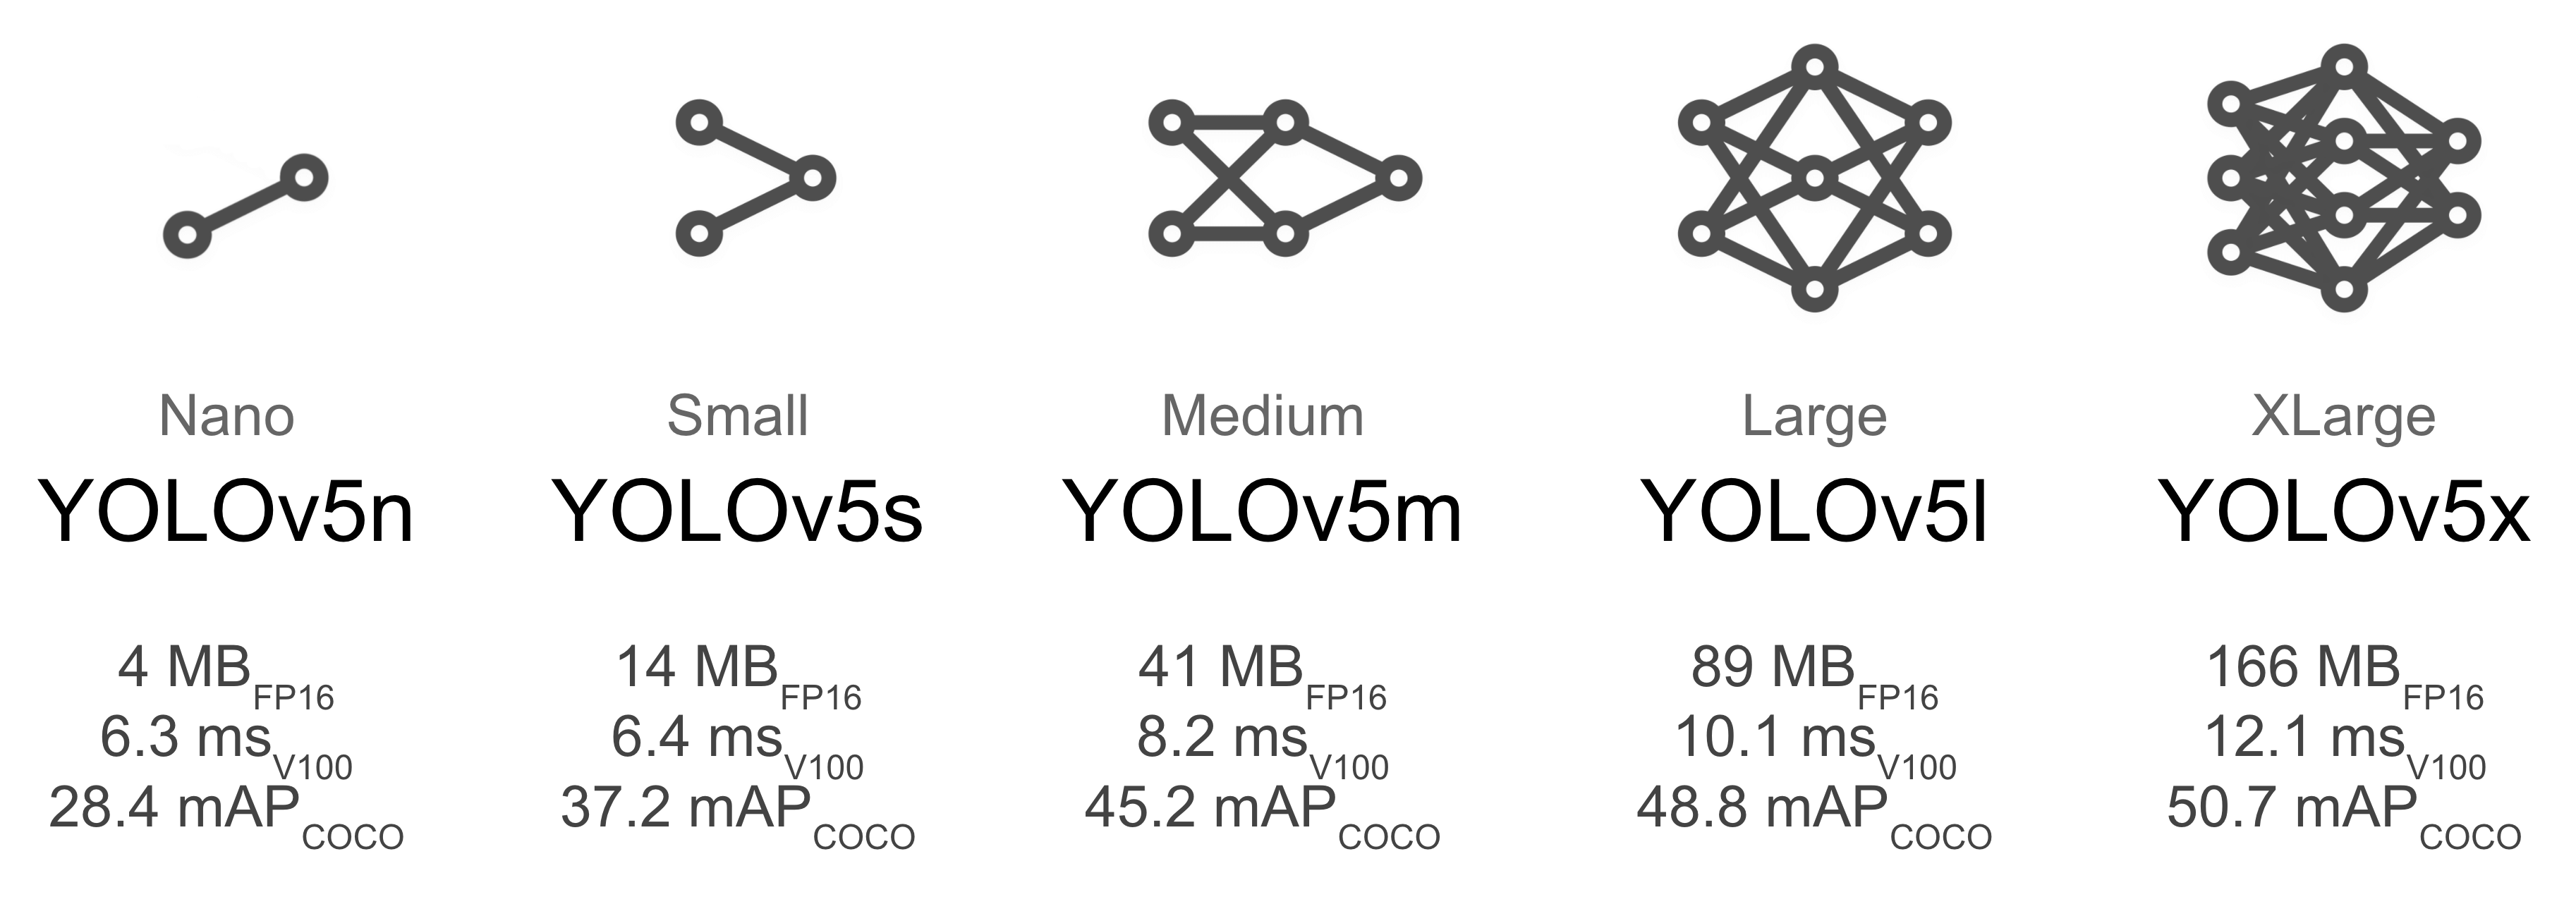

Below are the commands I ran in anaconda prompt (command line). Please watch videos for output!

In [ ]:
git clone https://github.com/ultralytics/yolov5  # clone
cd yolov5

conda create --name yolov5 #create virtual env named yolov5
# type `y` (yes) to proceed

conda activate yolov5  #activate the new env

pip install -r requirements.txt  # install packages, dependencies

In [ ]:
# test the small model using my webcam
python detect.py --source 0

# it is quite slow on my laptop, so I then try the nano model
python detect.py --weights yolov5n.pt --source 0

In [ ]:
# now to run the small model again using video data
python detect.py --weights yolov5s.pt --source ../video.mp4

#the model is outputting frame by frame in the terminal, now to view the video as the model is running
python detect.py --source ../video.mp4 --view-img


### video is quite large, so I go back to resize and collect more video data, including one with no pedestrians

Video data sourced from Pexels:
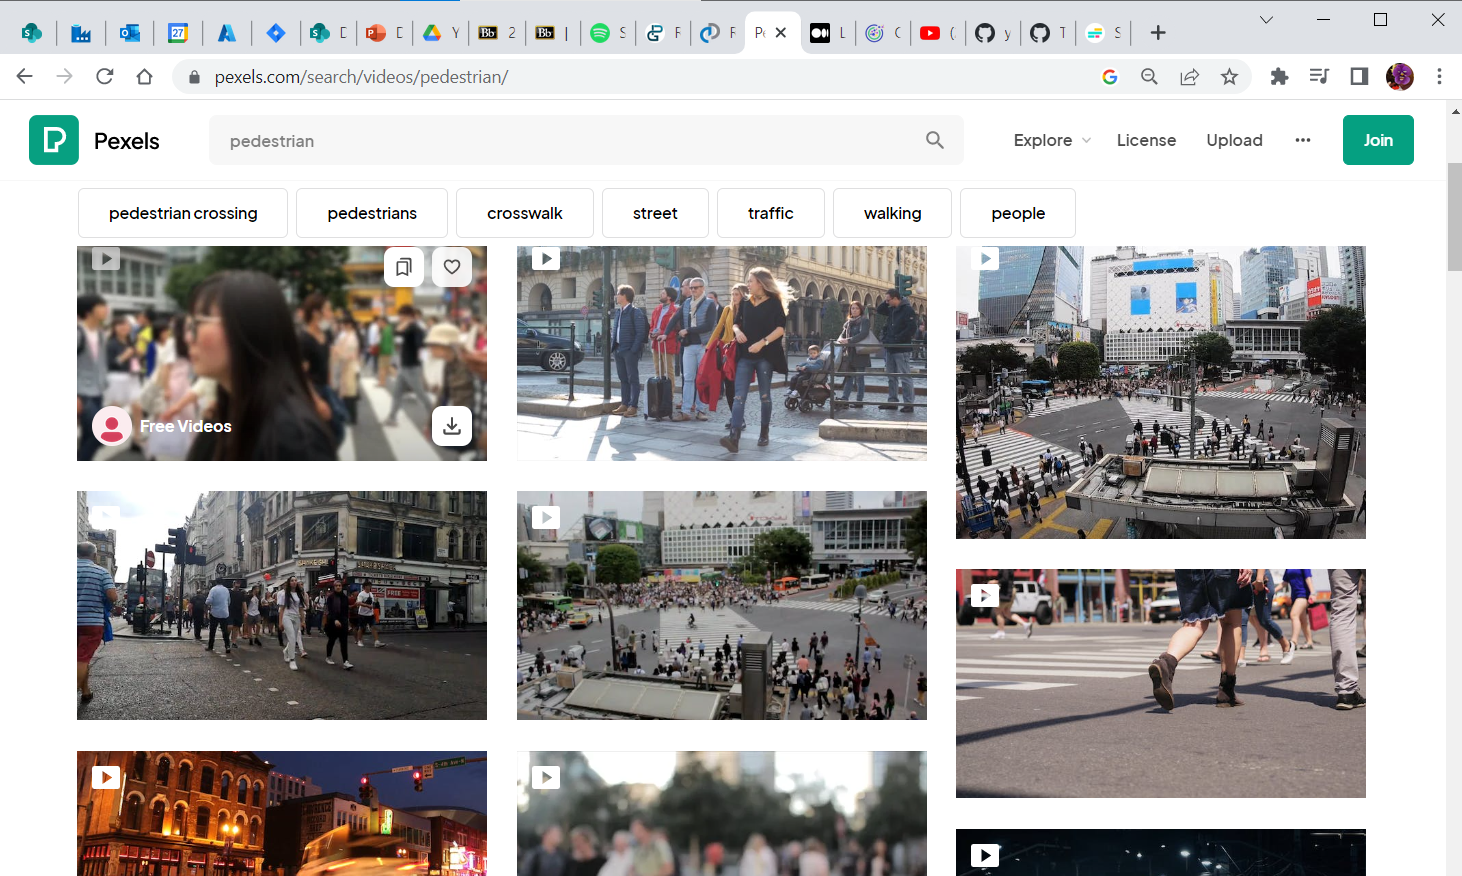

compressed 4 mp4 files using kapwing.com (free video editor)

In [ ]:
# run the resized video with the nano size version
python detect.py --weights yolov5n.pt --source ../video3.mp4 --view-img